In [2]:
import os

In [3]:
from dotenv import load_dotenv

In [4]:
load_dotenv()

dataset_path = os.getenv('DATASET_PATH')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


In [6]:
df = pd.read_csv(dataset_path) 


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [9]:
# listing all columns
list(df)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

# **for filtering out columns**
- I opened the output of the list(df) into a text element, copied that and put it in a text file (bc it was read-only), then **removed** the columns I wanted to **keep**, then copied the resulting list into columns_to_drop

In [10]:
# dropping columns and creating new dataframe
columns_to_drop = ['OWN_CAR_AGE', 
'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']
df_dropped = df.drop(columns=columns_to_drop)
list(df_dropped)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_WORK_PHONE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDI

In [11]:
#list of variables after dropping columns
list(df_dropped)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_WORK_PHONE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDI

In [12]:
# checking for null values
df_dropped.info()

null_counts = df_dropped.isnull().sum()
print(null_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

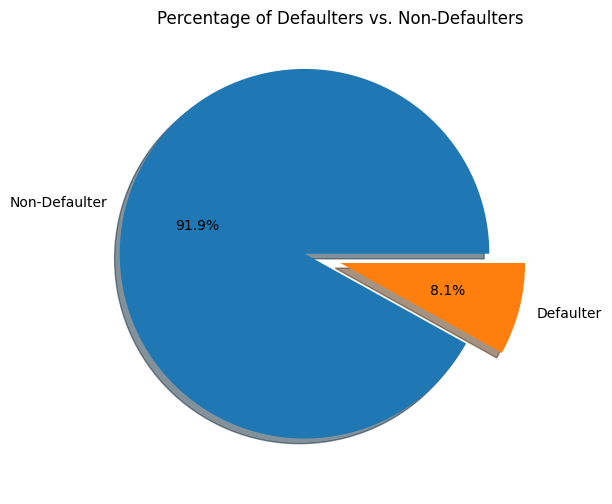

In [13]:
# determining the amount of clients with trouble making payments 
df_piechart = df_dropped['TARGET'].value_counts().reset_index()
df_piechart['TARGET'] = np.where(df_piechart['TARGET'] == 1, "Defaulter", "Non-Defaulter")
df_piechart

plt.figure(figsize=(10,6))
plt.pie(df_piechart['count'], 
        labels=df_piechart['TARGET'], 
        autopct='%.1f%%', 
        explode=[0.2, 0],
        shadow=True);
plt.title("Percentage of Defaulters vs. Non-Defaulters", loc='center');

# The pie chart shows that 8.1% of clients have trouble making payments

C:\Users\parks\AppData\Local\Temp\ipykernel_44012\804426853.py:6: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_sum_income = df_income.groupby(['TARGET']).agg(


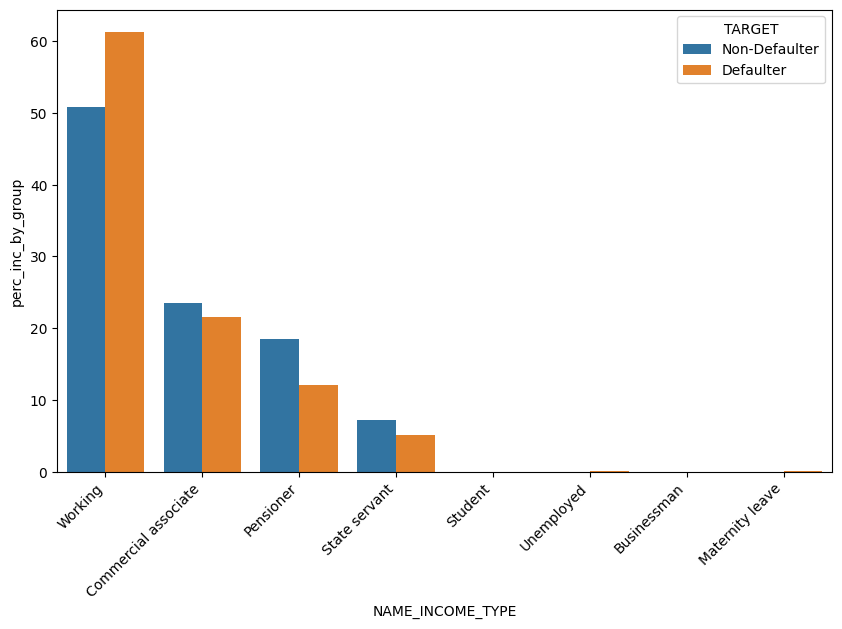

In [14]:
#comparing income types between the two target groups

df_income = df_dropped[['TARGET',
 'NAME_INCOME_TYPE']].groupby(['TARGET']).value_counts().reset_index()

df_sum_income = df_income.groupby(['TARGET']).agg(
    total_income = pd.NamedAgg(column='count', aggfunc=sum)).reset_index()

perc_income = df_income.merge(df_sum_income, on='TARGET')

perc_income['perc_inc_by_group'] = (perc_income['count'] / perc_income['total_income'] * 100.0)
perc_income['TARGET'] = np.where(perc_income['TARGET'] == 1, "Defaulter", "Non-Defaulter")

plt.figure(figsize=(10,6))
sns.barplot(
    x=perc_income['NAME_INCOME_TYPE'],
    y=perc_income['perc_inc_by_group'],
    hue=perc_income['TARGET'],
    errorbar=('ci', False));
plt.xticks(rotation=45, horizontalalignment='right');

# The bar chart shows that the percentage of defaulters is highest for clients with income type 'Working'

C:\Users\parks\AppData\Local\Temp\ipykernel_44012\1060764040.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_sum_educ = df_educ.groupby(['TARGET']).agg(


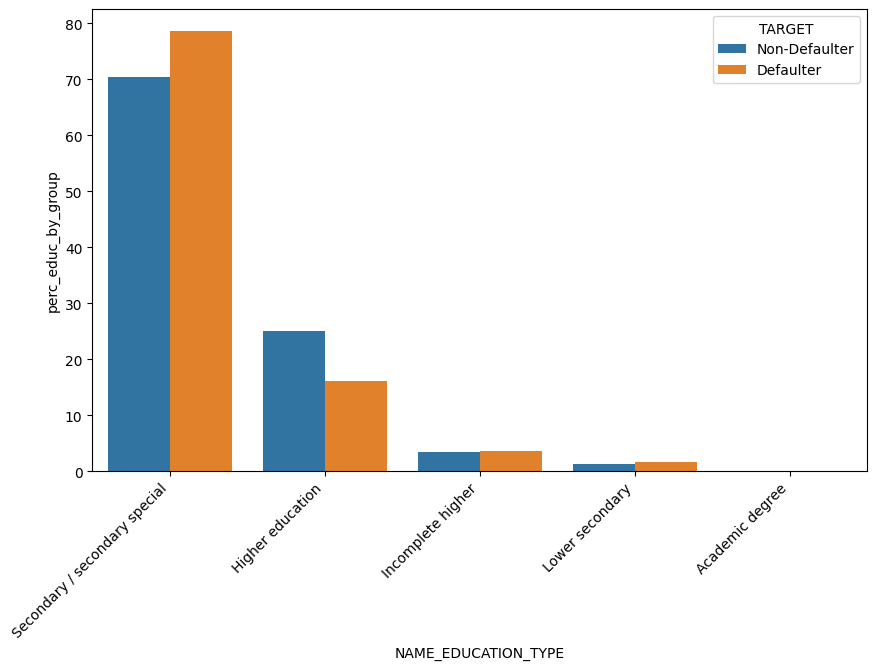

In [15]:
df_educ = df_dropped[['TARGET',
 'NAME_EDUCATION_TYPE']].groupby(['TARGET']).value_counts().reset_index()

df_sum_educ = df_educ.groupby(['TARGET']).agg(
    total_educ = pd.NamedAgg(column='count', aggfunc=sum)).reset_index()

perc_educ = df_educ.merge(df_sum_educ, on='TARGET')

perc_educ['perc_educ_by_group'] = (perc_educ['count'] / perc_educ['total_educ'] * 100.0)
perc_educ['TARGET'] = np.where(perc_educ['TARGET'] == 1, "Defaulter", "Non-Defaulter")

plt.figure(figsize=(10,6))
sns.barplot(
    x=perc_educ['NAME_EDUCATION_TYPE'],
    y=perc_educ['perc_educ_by_group'],
    hue=perc_educ['TARGET'],
    errorbar=('ci', False));
plt.xticks(rotation=45, horizontalalignment='right');

# The bar chart shows that the percentage of defaulters is highest for clients with education type 'Secondary / secondary special'

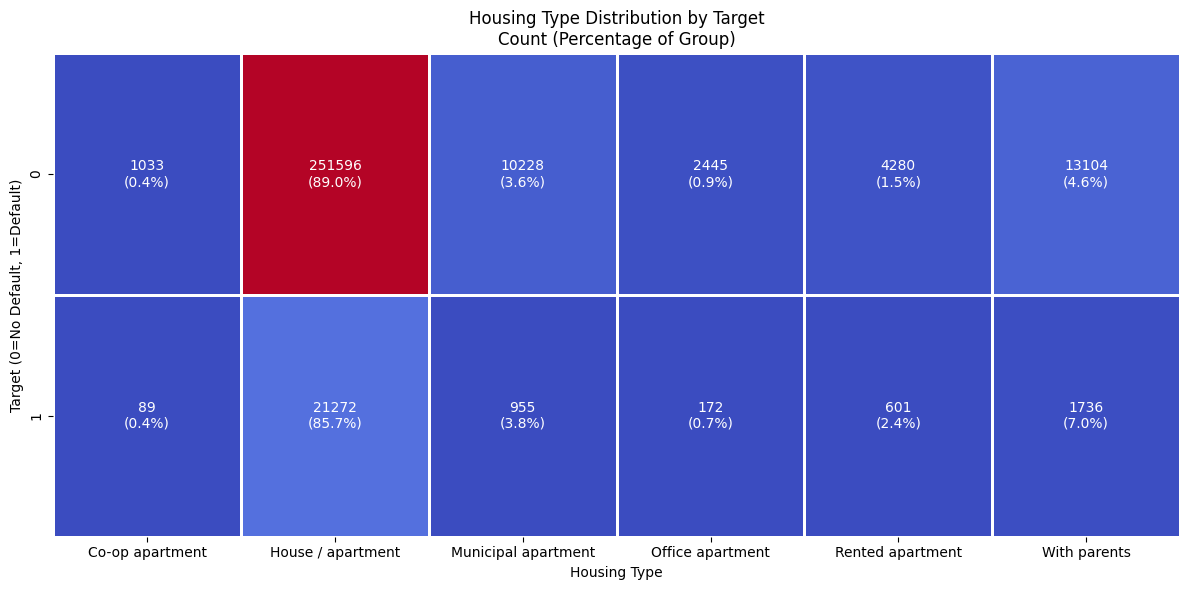

In [16]:
# Grouping by 'TARGET' and 'NAME_FAMILY_STATUS' 
count_df = df_dropped.groupby(['TARGET', 'NAME_HOUSING_TYPE']).size().reset_index(name='count')

# Calculate the total counts for each 'TARGET' group
total_counts = count_df.groupby('TARGET')['count'].transform('sum')

# Calculate the percentage of each 'NAME_HOUSING_TYPE' within each 'TARGET' group
count_df['percent'] = (count_df['count'] / total_counts * 100).round(1)

# Create a new column with the count and percentage for each 'NAME_HOUSING_TYPE'
count_df['label'] = count_df['count'].astype(str) + '\n(' + count_df['percent'].astype(str) + '%)'

# Pivot the data so that 'NAME_HOUSING_TYPE' is the column and 'TARGET' is the index
pivot_count = count_df.pivot(index='TARGET', columns='NAME_HOUSING_TYPE', values='count').fillna(0)
pivot_label = count_df.pivot(index='TARGET', columns='NAME_HOUSING_TYPE', values='label').fillna('')

# Plot the heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(
    pivot_count, 
    annot=pivot_label.values,  # Use our combined labels
    fmt='',                   # Empty fmt since we pre-formatted
    cmap='coolwarm', 
    cbar = False,
    linewidths=1,
    annot_kws={'ha': 'center', 'va': 'center'}
)

# Set the axis labels and plot title
plt.title('Housing Type Distribution by Target\nCount (Percentage of Group)')
plt.xlabel('Housing Type')
plt.ylabel('Target (0=No Default, 1=Default)')
plt.tight_layout()
plt.show()

# **Initial Thoughts**

 - it seems like there are some null values in OWN_AGE_CAR, OCCUPATION_TYPE, AMT_REQ_CREDIT(many columns)
    - client may not own a car
    - people might not have a previous application to reference
 - datatypes are a mix of integers, floats, and objects (strings)
 - clients who have trouble paying represent ~8% of the dataset

In [17]:
df_dropped[['TARGET', 
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE']].groupby(['TARGET']).mean()

# The table shows that the average number of children is higher for defaulters than non-defaulters
# However average income, credit amount, annuity amount and goods price is lower for defaulters than non-defaulters

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
TARGET,,,,,
0,0.412946,169077.722266,602648.282002,27163.623349,542736.795003
1,0.463807,165611.760906,557778.527674,26481.744290,488972.412554


CNT_CHILDREN                AMT_INCOME_TOTAL                     \
               mean median min max             mean    median      min   
TARGET                                                                   
0          0.412946    0.0   0  19    169077.722266  148500.0  25650.0   
1          0.463807    0.0   0  11    165611.760906  135000.0  25650.0   

                        AMT_CREDIT                                \
                max           mean    median      min        max   
TARGET                                                             
0        18000090.0  602648.282002  517788.0  45000.0  4050000.0   
1       117000000.0  557778.527674  497520.0  45000.0  4027680.0   

         AMT_ANNUITY                            AMT_GOODS_PRICE            \
                mean   median     min       max            mean    median   
TARGET                                                                      
0       27163.623349  24876.0  1615.5  258025.5   542736.795003  450000.0   
1       26481.744290  25263.0  2722.5  149211.0   488972.412554  450000.0   

                            
            min        max  
TARGET                      
0       40500.0  4050000.0  
1       45000.0  3600000.0

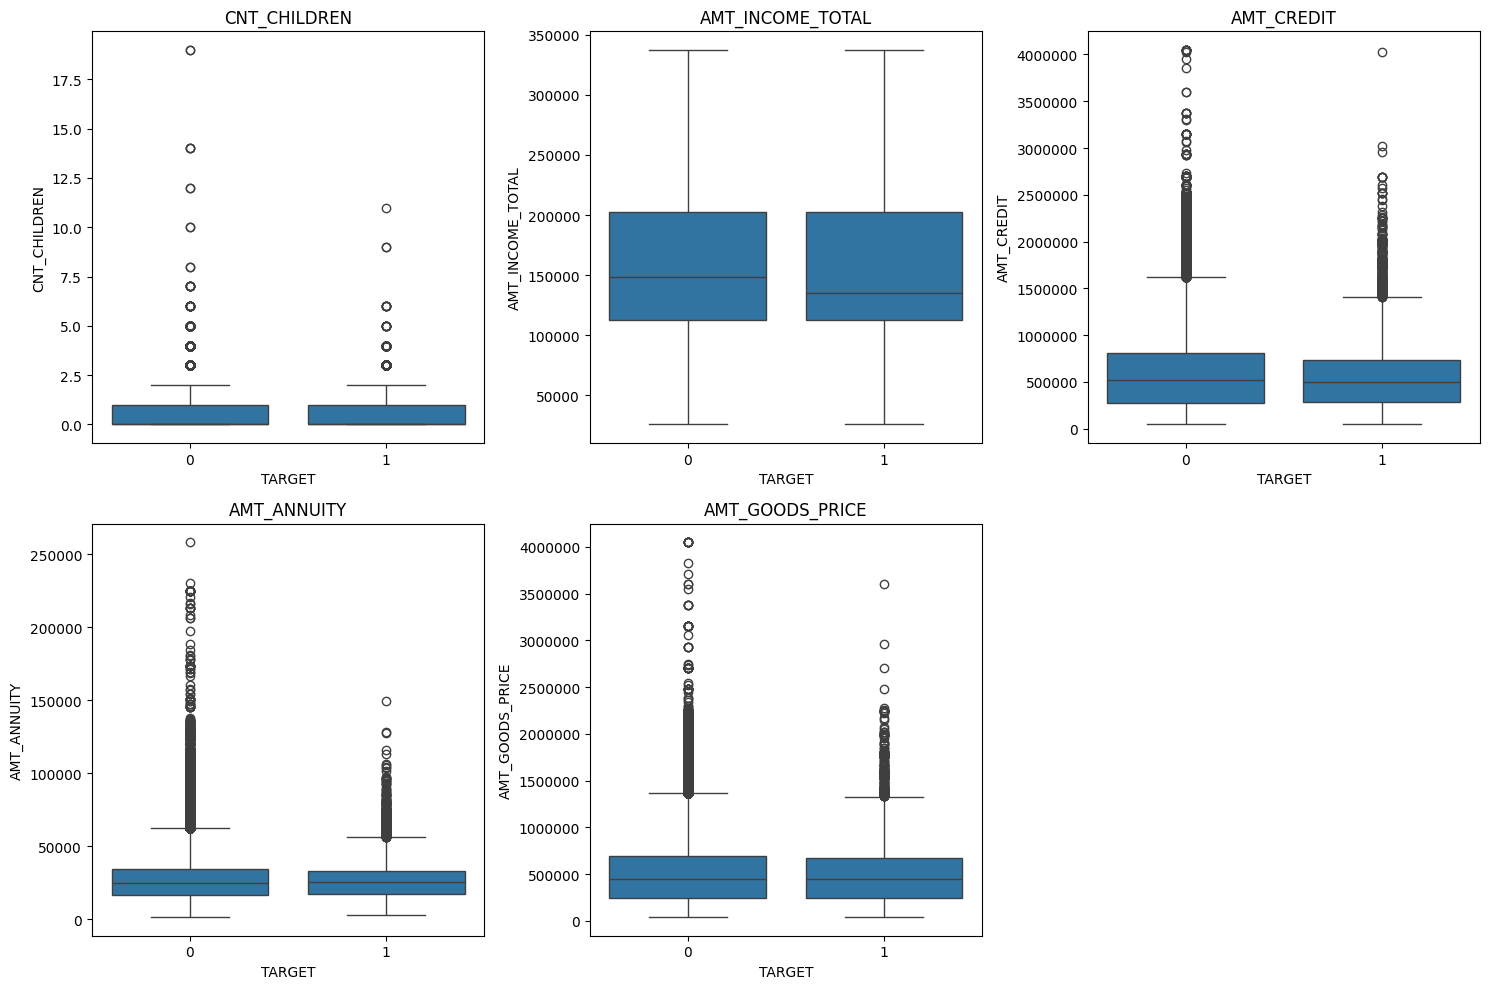

In [18]:
# aggregated table for children, income, credit, annuity, loan amt
agg_df = df_dropped.groupby(['TARGET']).agg(
    {'CNT_CHILDREN': ['mean', 'median', 'min', 'max'],
 'AMT_INCOME_TOTAL': ['mean', 'median', 'min', 'max'],
 'AMT_CREDIT': ['mean', 'median', 'min', 'max'],
 'AMT_ANNUITY': ['mean', 'median', 'min', 'max'],
 'AMT_GOODS_PRICE': ['mean', 'median', 'min', 'max']})
display(agg_df)

plt.figure(figsize=(15, 10))

# Create a boxplot for each column
plt.subplot(2, 3, 1)
sns.boxplot(x='TARGET', y='CNT_CHILDREN', data=df_dropped)
plt.title('CNT_CHILDREN')

plt.subplot(2, 3, 2)
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df_dropped, showfliers=False)
plt.title('AMT_INCOME_TOTAL')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(2, 3, 3)
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=df_dropped)
plt.title('AMT_CREDIT')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(2, 3, 4)
sns.boxplot(x='TARGET', y='AMT_ANNUITY', data=df_dropped)
plt.title('AMT_ANNUITY')

plt.subplot(2, 3, 5)
sns.boxplot(x='TARGET', y='AMT_GOODS_PRICE', data=df_dropped)
plt.title('AMT_GOODS_PRICE')
plt.ticklabel_format(style='plain', axis='y')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

** note to self: when referencing multiple columns from df you need double brackets

# ** insights **
- For the dataset, we are going to denote the target variable of value 1 to be individuals that have defaulted on their loan(s).
- Based on the aggregate functions, we can see that defaulters on average have more children, but the median shows that the sample population mostly do not have childern. 
- The median and mean income of loan defaulters is lower than non-defaulters. However, there is one potential major outlier in the loan defaulters group with an income of $117,000,000. Outside of that outlier, the graph for the amount income is comparable between the two groups.
- The median and mean amount of credit is also lower for loan defaulter than that of non-defaulters. From the plot, we can see that non-defaulters interquartile range is larger and skews higher than the defaulters range, but both have relatively similar variablity.
- The mean amount annuity is lower for defaulters and the median amount annuity is higher for defaulters. From the plot, non-defaulters have a much higher spread and variability with significantly more outliers in magnitude. 
- The mean mean good price amount is lower for defaulters with the median amount being the same for defaulters and non-defaulters. From the plot, non-defaulters have a much higher spread and variability with signficiantly more outliers in magnitude.

In [19]:
df_dropped[['TARGET', 
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',]].groupby(['TARGET']).mean()
#check if there are correlated in any way

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
TARGET,,,,
0,1.415742,0.139148,1.398923,0.096688
1,1.496147,0.191980,1.477672,0.138247


# I still don't really know what this means ^ 

In [20]:
df_dropped[['TARGET', 
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']].groupby(['TARGET']).mean()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,,,,,,
0,0.006380,0.006914,0.034315,0.270697,0.265939,1.889199
1,0.006672,0.008036,0.034919,0.227926,0.259923,2.028783


In [21]:
df_dropped[['TARGET', 
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']].groupby(['TARGET']).count()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,,,,,,
0,245459,245459,245459,245459,245459,245459
1,20533,20533,20533,20533,20533,20533


In [22]:
# looking at occupation types grouped by defaulters and non-defaulters
df_occupations = df_dropped[['TARGET', 'OCCUPATION_TYPE']].groupby(['TARGET']).value_counts().reset_index() # note to self: when pandas returns .value_counts() as a series, reset the index to get a dataframe
df_occupations

,TARGET,OCCUPATION_TYPE,count
0,0,Laborers,49348
1,0,Sales staff,29010
2,0,Core staff,25832
3,0,Managers,20043
4,0,Drivers,16496
5,0,High skill tech staff,10679
6,0,Accountants,9339
7,0,Medicine staff,7965
8,0,Security staff,5999
9,0,Cooking staff,5325


In [23]:
# looking at total number of workers for each group
df_sum_workforce = df_occupations.groupby(['TARGET']).agg(
    total_workforce = pd.NamedAgg(column='count', aggfunc=sum)).reset_index()

df_sum_workforce

C:\Users\parks\AppData\Local\Temp\ipykernel_44012\2195815078.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_sum_workforce = df_occupations.groupby(['TARGET']).agg(


,TARGET,total_workforce
0,0,192573
1,1,18547


In [24]:
# I want to get a percentage representation of the worker type for each group, I need the total for each group on each row, so I merge the tables on the target group
percentage_workforce = df_occupations.merge(df_sum_workforce, on='TARGET')
percentage_workforce

,TARGET,OCCUPATION_TYPE,count,total_workforce
0,0,Laborers,49348,192573
1,0,Sales staff,29010,192573
2,0,Core staff,25832,192573
3,0,Managers,20043,192573
4,0,Drivers,16496,192573
5,0,High skill tech staff,10679,192573
6,0,Accountants,9339,192573
7,0,Medicine staff,7965,192573
8,0,Security staff,5999,192573
9,0,Cooking staff,5325,192573


In [25]:
# checking that the columns are the correct datatype (int)
percentage_workforce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TARGET           36 non-null     int64 
 1   OCCUPATION_TYPE  36 non-null     object
 2   count            36 non-null     int64 
 3   total_workforce  36 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.3+ KB


In [26]:
# creating the percentage column and also changing the target group from int to identifiable string
percentage_workforce['percentage_workforce_by_group'] = (percentage_workforce['count'] / percentage_workforce['total_workforce'] * 100.0)
percentage_workforce['TARGET'] = np.where(percentage_workforce['TARGET'] == 1, "Defaulter", "Non-Defaulter")
percentage_workforce

,TARGET,OCCUPATION_TYPE,count,total_workforce,percentage_workforce_by_group
0,Non-Defaulter,Laborers,49348,192573,25.625607
1,Non-Defaulter,Sales staff,29010,192573,15.064417
2,Non-Defaulter,Core staff,25832,192573,13.414134
3,Non-Defaulter,Managers,20043,192573,10.408001
4,Non-Defaulter,Drivers,16496,192573,8.566102
5,Non-Defaulter,High skill tech staff,10679,192573,5.545430
6,Non-Defaulter,Accountants,9339,192573,4.849590
7,Non-Defaulter,Medicine staff,7965,192573,4.136094
8,Non-Defaulter,Security staff,5999,192573,3.115182
9,Non-Defaulter,Cooking staff,5325,192573,2.765185


Text(0.5, 0, 'Occupation Type')

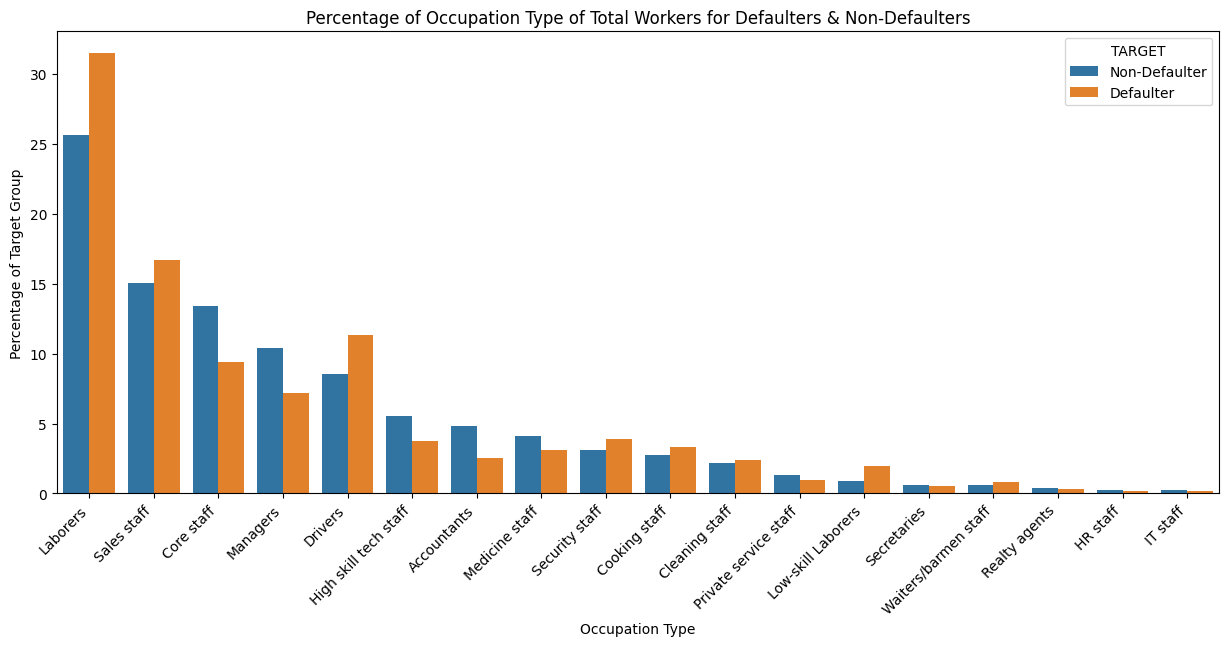

In [27]:
plt.figure(figsize=(15,6))
sns.barplot(
    x=percentage_workforce['OCCUPATION_TYPE'],
    y=percentage_workforce['percentage_workforce_by_group'],
    hue=percentage_workforce['TARGET'],
    errorbar=('ci', False));
plt.xticks(rotation=45, horizontalalignment='right');
plt.title("Percentage of Occupation Type of Total Workers for Defaulters & Non-Defaulters")
plt.ylabel('Percentage of Target Group')
plt.xlabel('Occupation Type')

The data indicates that the distribution of occupations among those who took out loans are similar, however, it seems that out of those who are making late payments, laborers make up a higher percentage

We should look more closely at occupation type and how it affects loan payments, maybe more caution should be taken with laborers

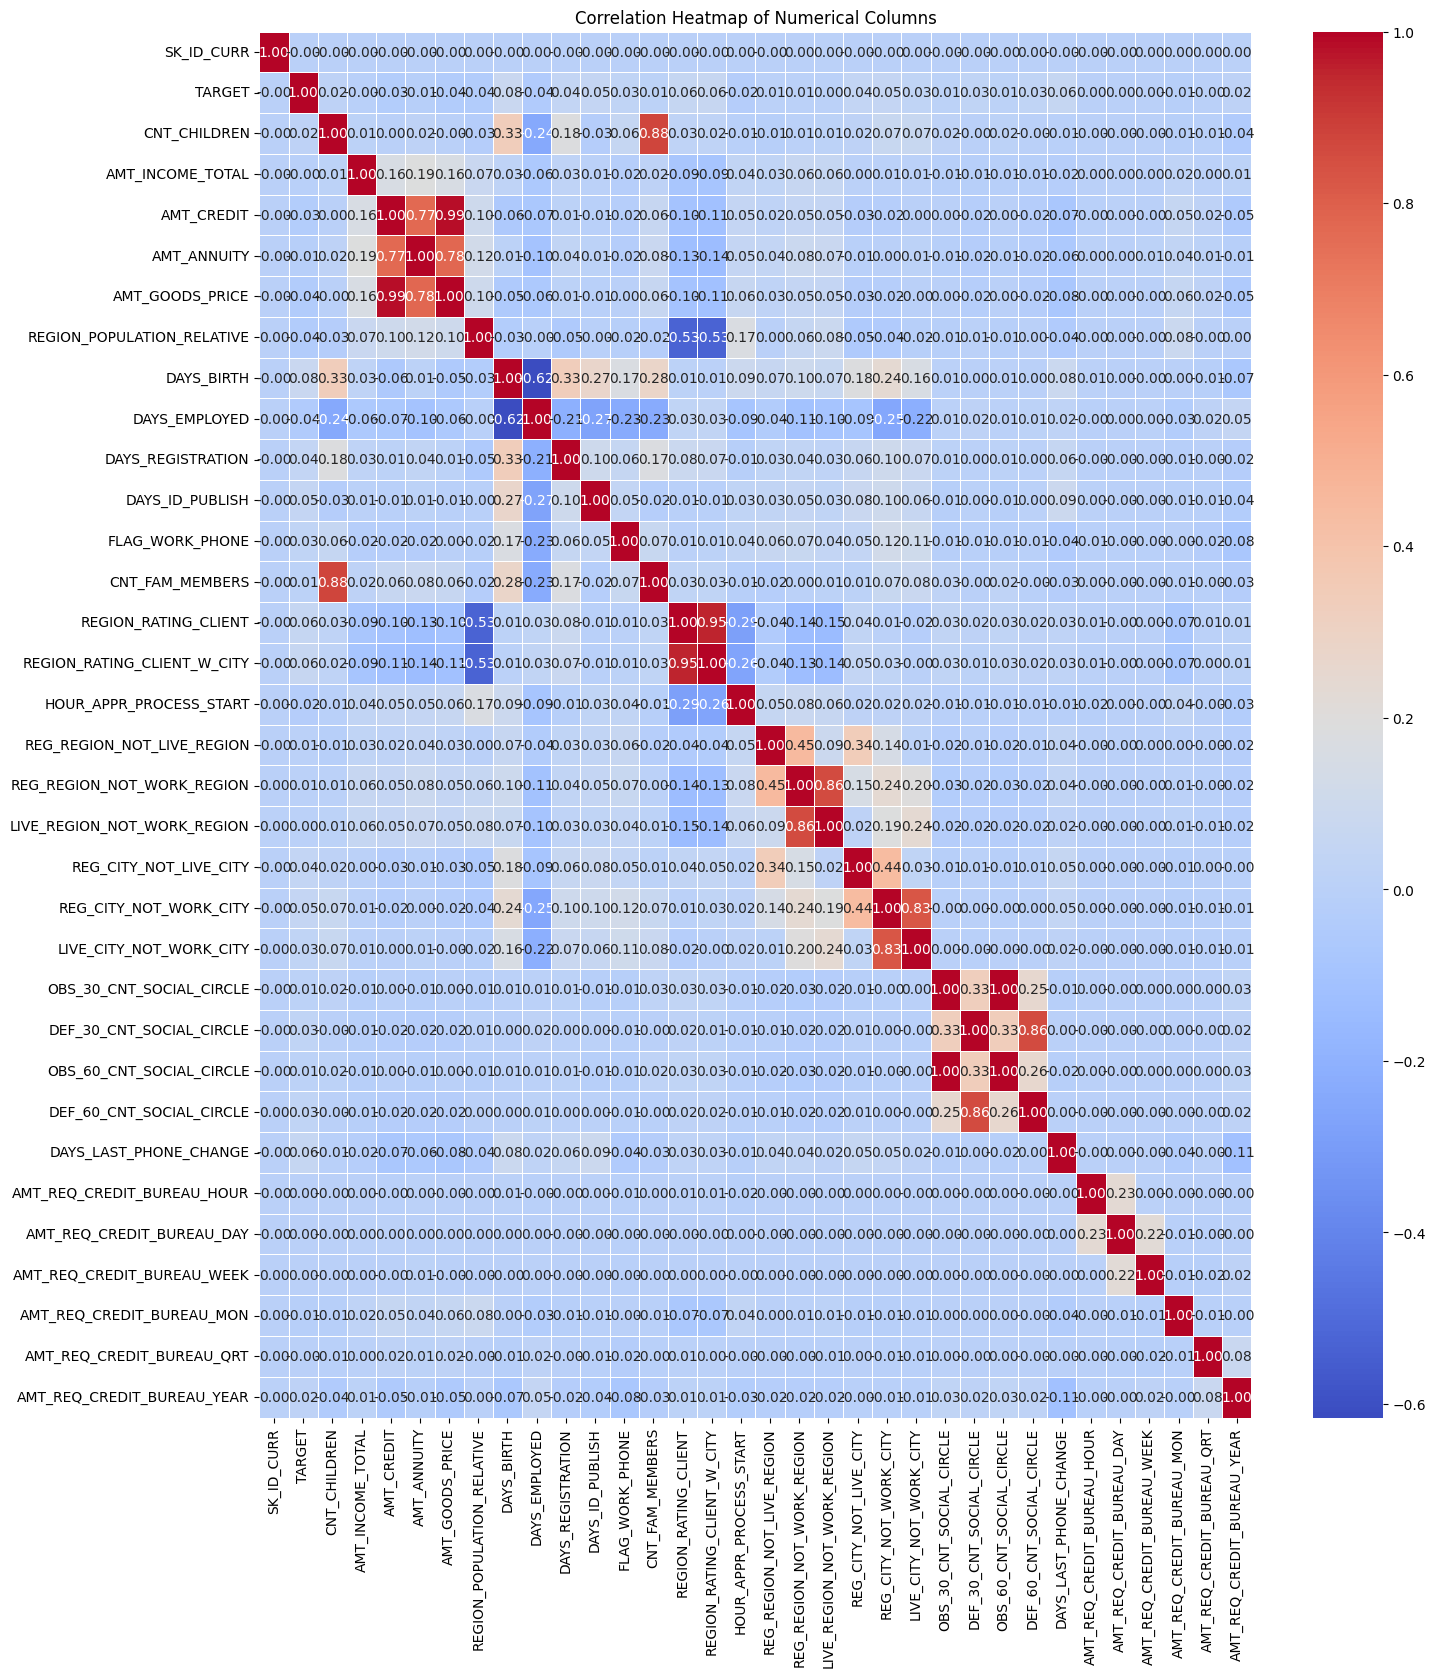

In [28]:
# Correlation matrices of numerical variables
df_numerical = df_dropped.select_dtypes(include=['int64', 'float64'])
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(16, 18))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.4);
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# print(df_dropped['HOUR_APPR_PROCESS_START'])
# Note: Hour appr process start is a categorical variable, so it should be converted to a categorical variable

We see that from the correlation matrix that there is a strong correlation between the following variables:Amount Credit and amount good price, count of children and count of family members, region rating cliend and region rating client with city, registered region but not working region and living region but not working region, observed 30 count social circle and observed 60 count social circle, default 30 count social circle and default 60 count social circle.

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')


C:\Users\parks\AppData\Local\Temp\ipykernel_44012\1321206777.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binaries.dropna(inplace=True)
C:\Users\parks\AppData\Local\Temp\ipykernel_44012\1321206777.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binaries.drop(df_binaries[df_binaries['CODE_GENDER'] == 'XNA'].index, inplace=True)


Text(0.5, 1.0, 'Phi Coefficient Correlation Matrix')

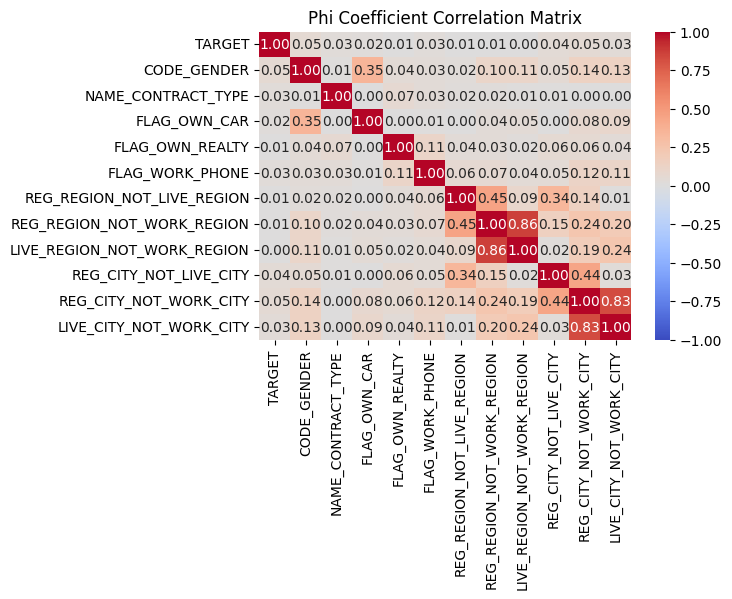

In [31]:
# Correlation of binary categorical variables
# Convert hour approximately application start to categorical
df_dropped['HOUR_APPR_PROCESS_START'] = df_dropped['HOUR_APPR_PROCESS_START'].astype('object')
print(df_dropped.select_dtypes(include=['object']).columns)

def is_binary(series):
    return series.nunique() == 2

df_dropped.pipe(is_binary)
# Name_CONTRACT_TYPE: Cash loans or revolving loans
# Flag_OWN_CAR: Yes or No
# Flag_OWN_REALTY: Yes or No
# Flag_WORK_PHONE: 1 or 0
# REG_REGION_NOT_LIVE_REGION: 1 or 0     
# REG_REGION_NOT_WORK_REGION: 1 or 0
# LIVE_REGION_NOT_WORK_REGION: 1 or 0
# REG_CITY_NOT_LIVE_CITY: 1 or 0
# REG_CITY_NOT_WORK_CITY: 1 or 0  
# LIVE_CITY_NOT_WORK_CITY: 1 or 0
# POTENTIALLY GENDER, might have to drop some rows that put XNA M and F



def phi_coefficient(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / n)


binary_columnns = ['TARGET','CODE_GENDER','NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_WORK_PHONE', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
df_binaries = df_dropped[binary_columnns]
df_binaries.dropna(inplace=True)
df_binaries.drop(df_binaries[df_binaries['CODE_GENDER'] == 'XNA'].index, inplace=True)

binary_correlation_matrix = pd.DataFrame(index=df_binaries.columns, columns=df_binaries.columns)

for col1 in df_binaries.columns:
    for col2 in df_binaries.columns:
        binary_correlation_matrix.loc[col1, col2] = phi_coefficient(df_binaries[col1], df_binaries[col2])

plt.figure(figsize=(6, 4))
sns.heatmap(
    binary_correlation_matrix.astype(float), 
    annot=True, 
    cmap='coolwarm', 
    vmin=-1, 
    vmax=1,
    fmt=".2f"
)
plt.title("Phi Coefficient Correlation Matrix")


We can see that there is correlation between REG_REGION_NOT_WORK_REGION and LIVE_REGION_NOT_WORK_REGION and REG_CITY_NOT_WORK_CITY and LIVE_CITY_NOT_WORK_CITY

In [30]:
# # Convert days birth and days employed to years
# df_dropped['DAYS_BIRTH'] = abs(df_dropped['DAYS_BIRTH']) // 365
# df_dropped.rename(columns = {'DAYS_BIRTH':'AGE_YEARS'}, inplace = True)

# df_dropped['DAYS_EMPLOYED'] = abs(df_dropped['DAYS_EMPLOYED']) // 365
# df_dropped.rename(columns = {'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace = True)

# Just might not be necessary
